# **Classification Model And Feature Importance**

**`Finance Domain Project`**



```
# Evaluating Bank Marketing Algorithm , Making classification model to predict  which clients are more likely to subscribe to their term
  deposits.
```



## **Understand Data**



```
1 Attribute information:

   Input variables:

   # bank client data:

   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

2. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label.
   These missing values can be treated as a possible class label or using deletion or imputation techniques.

```



## **EDA**

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/praveendecode/Datasets/main/bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Categorical Values**

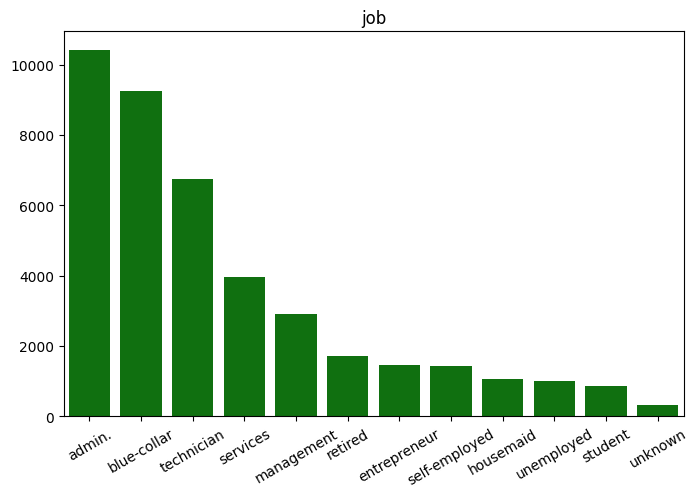

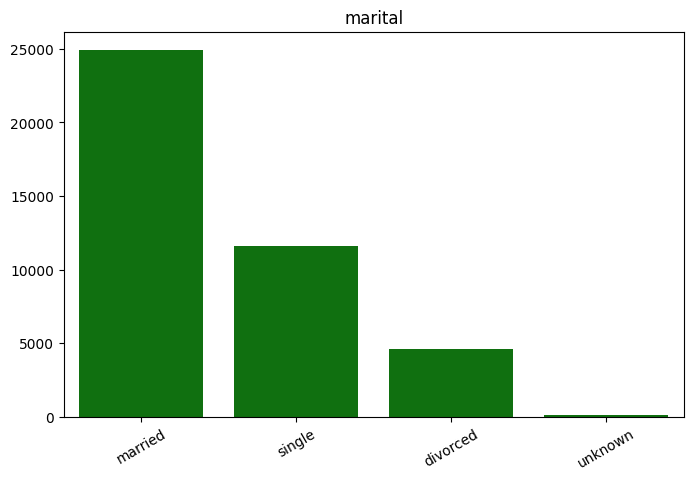

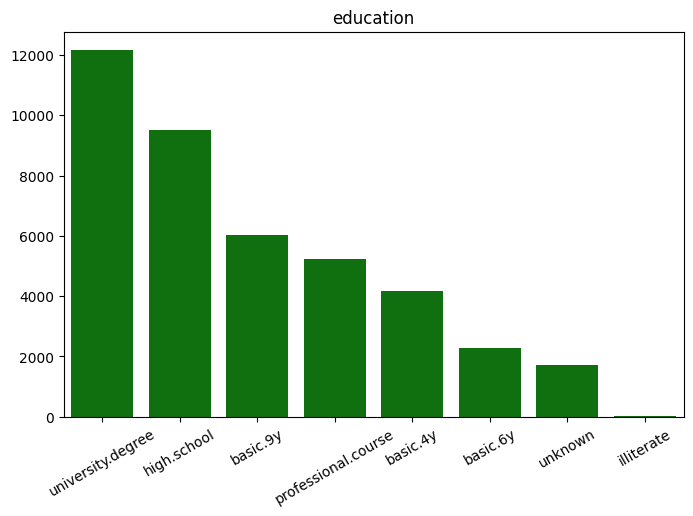

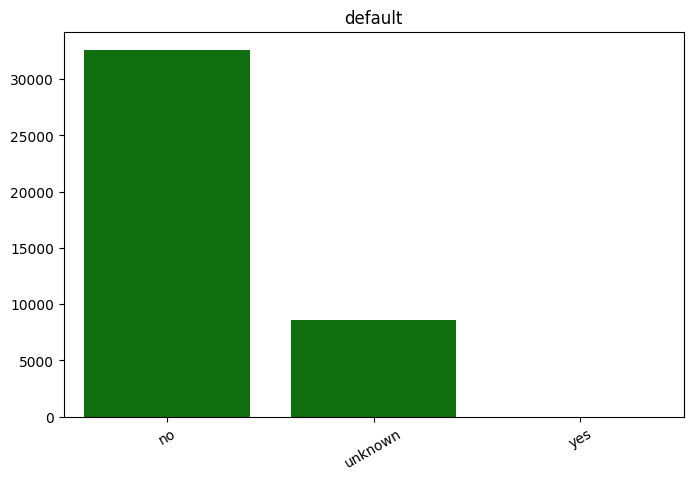

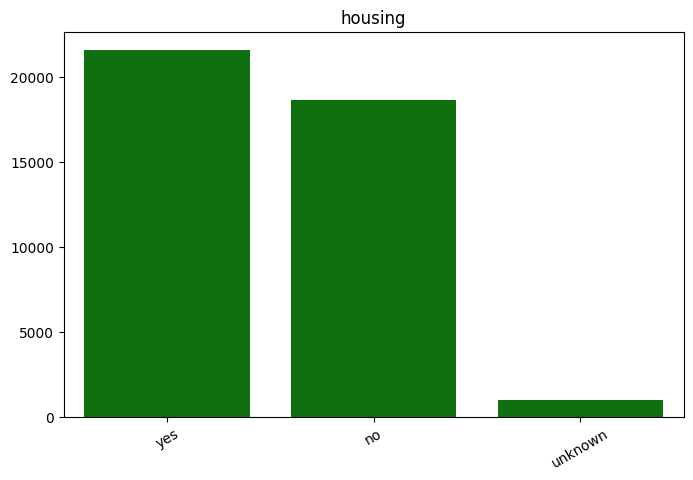

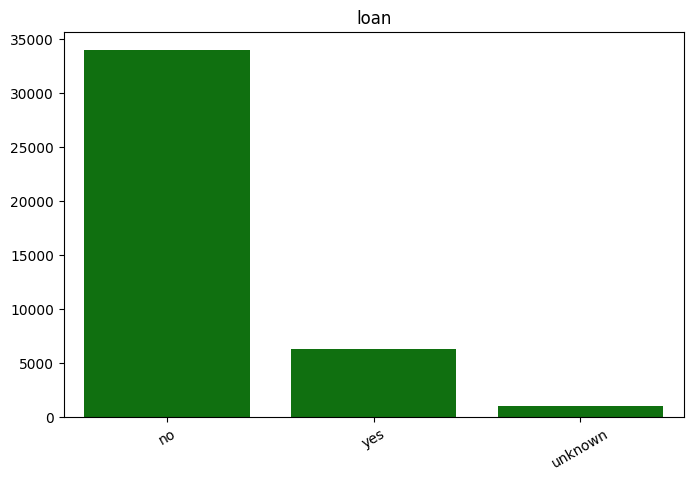

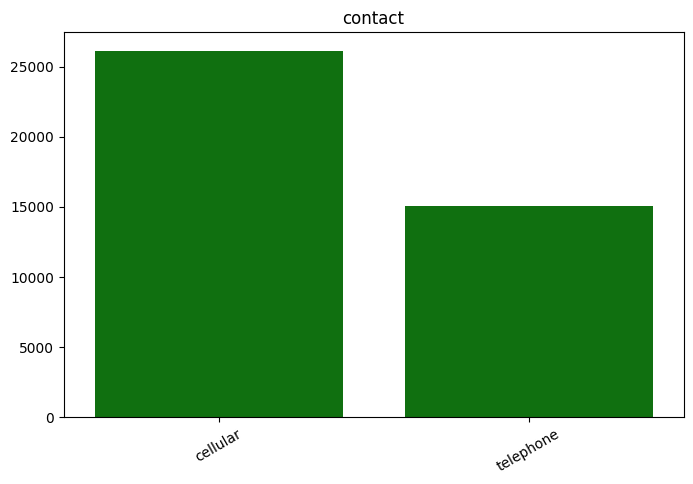

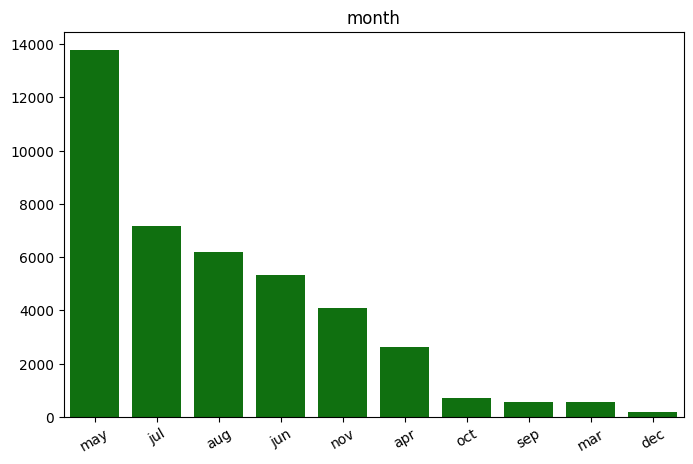

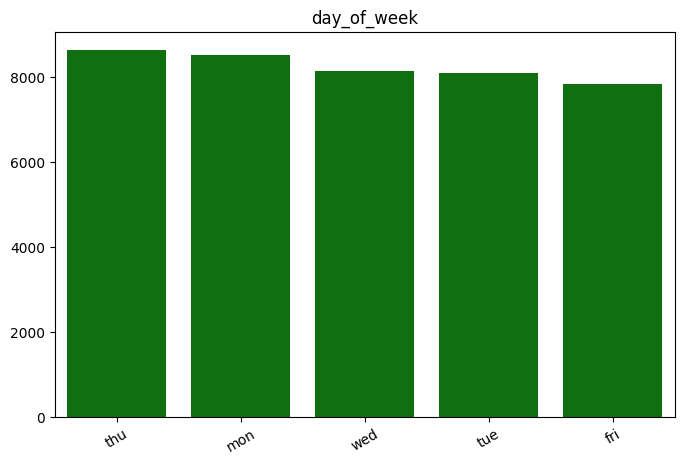

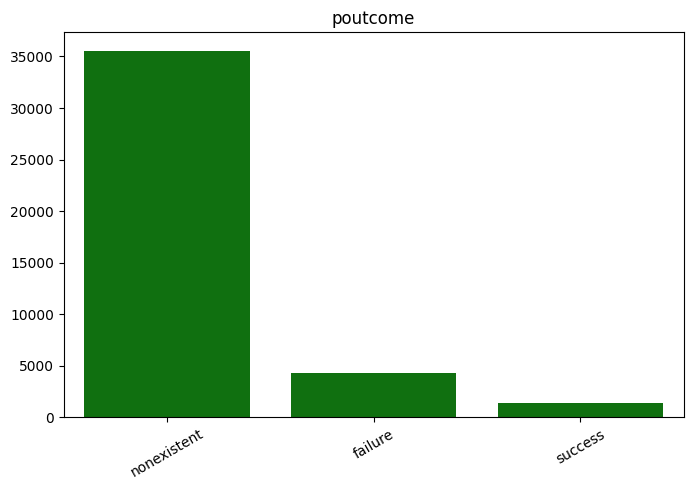

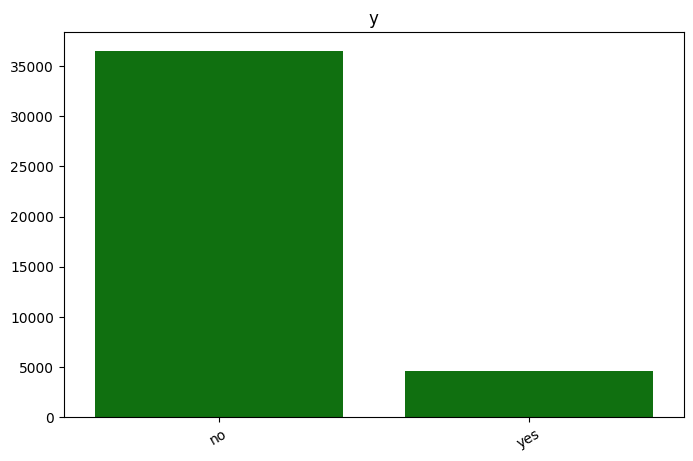

In [17]:
def cat_unique_dist(columns):
    for i in columns:
      names = df[i].value_counts().index.tolist()
      values = df[i].value_counts().values.tolist()
      plt.figure(figsize=(8,5))
      sns.barplot(x=names,y=values,color='g').set(title=f'{i}')
      plt.xticks(rotation=30)
      plt.show()
      print()



cat_unique_dist(df.select_dtypes(include=['object']))

**Continuos Features**

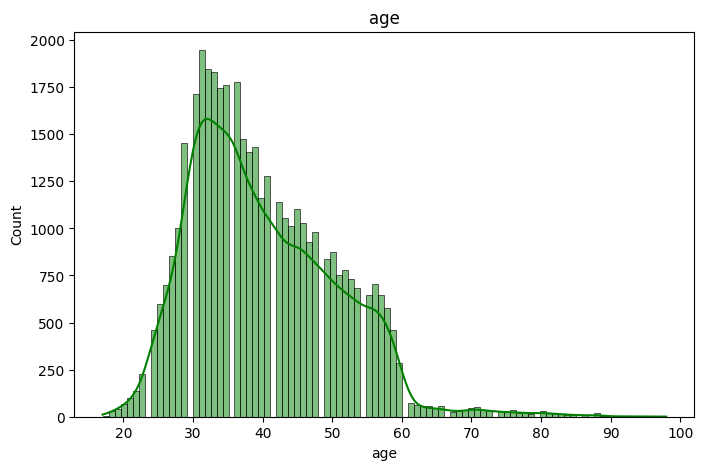

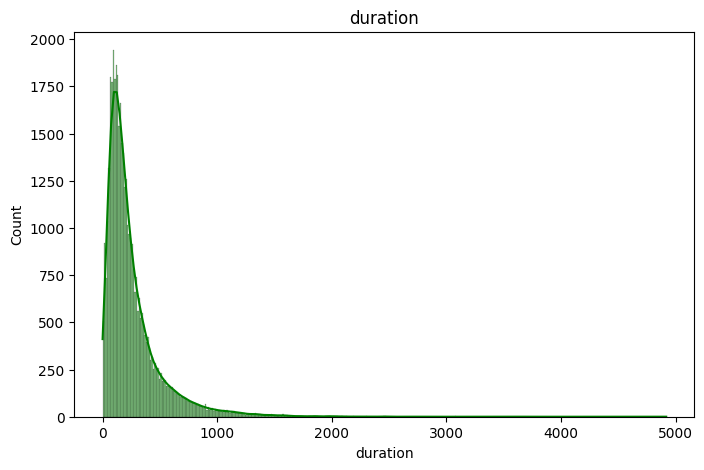

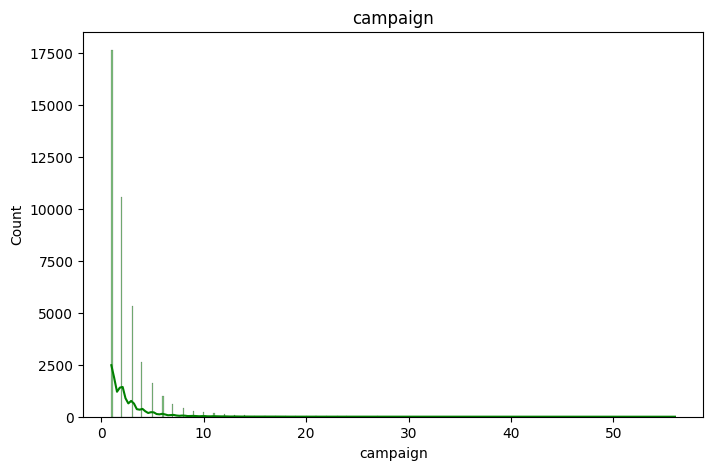

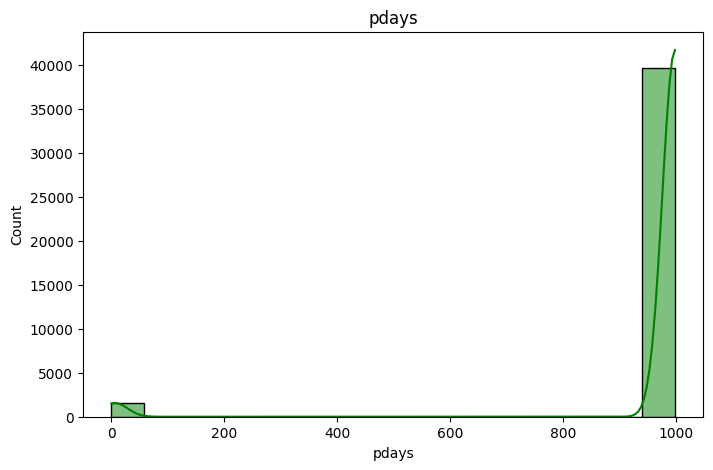

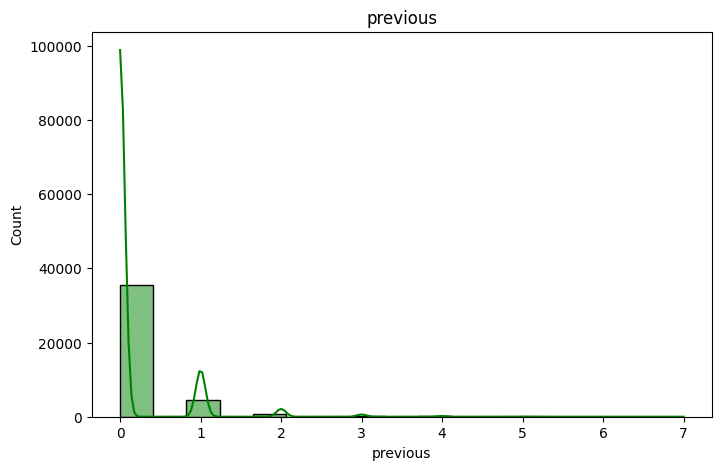

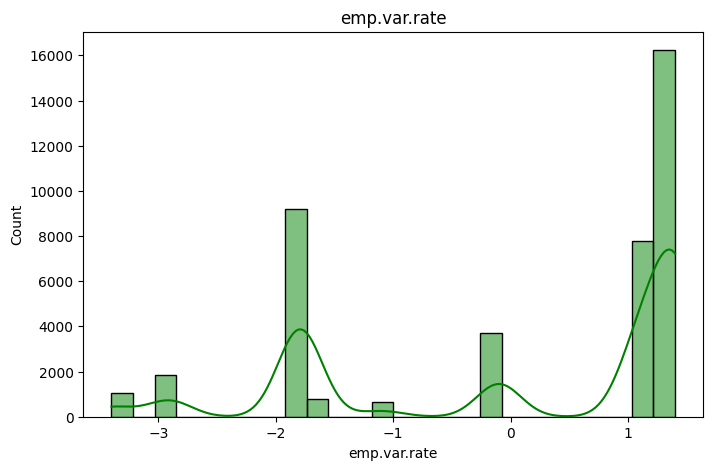

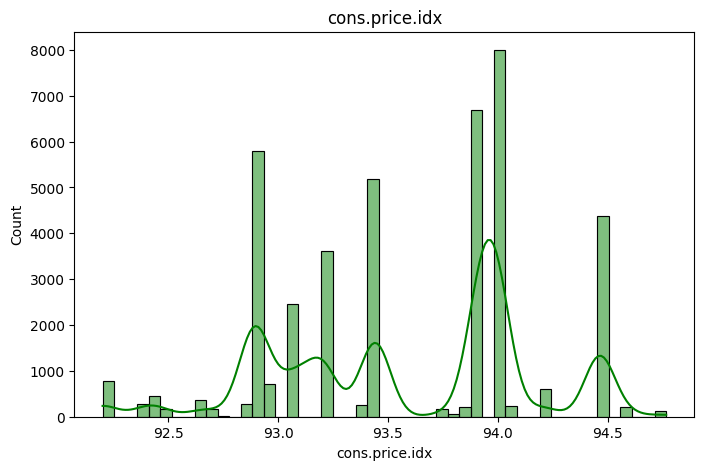

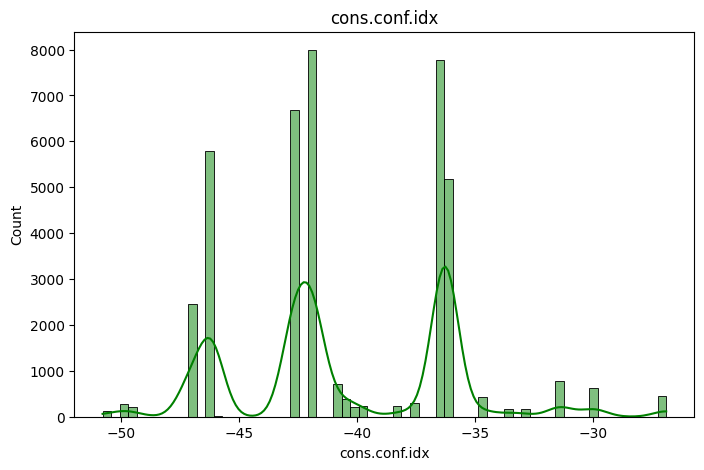

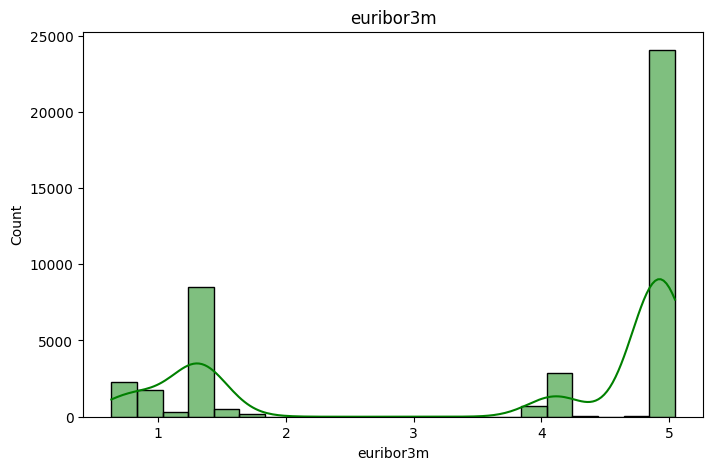

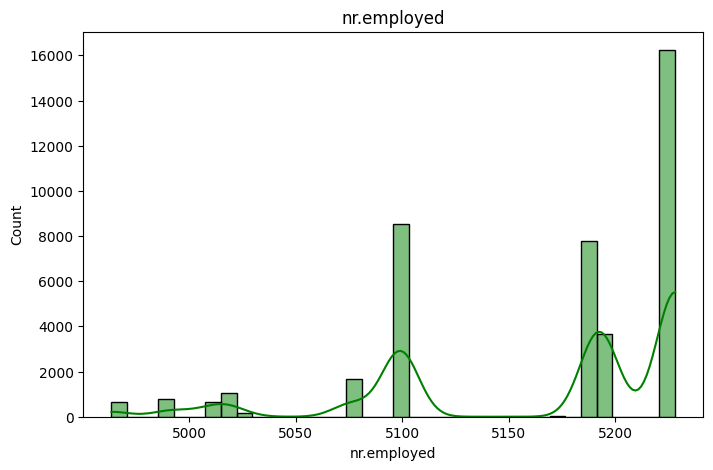

In [18]:
def con_dist(columns):
    for i in columns:
      plt.figure(figsize=(8,5))
      sns.histplot(data=df,x=i,color='g',kde=True).set(title=f'{i}')
      plt.show()
      print()



con_dist(df.select_dtypes(include=['number']))

**Unbalanced data**

In [59]:
df.y.value_counts(normalize=True)*100

0.0    88.734583
1.0    11.265417
Name: y, dtype: float64

## **Classification Model**

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler

In [27]:
encoder = OrdinalEncoder()

scaler  = StandardScaler()

In [23]:
def cat_unique_dist(columns):
    for i in columns:

      df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

cat_unique_dist(df.select_dtypes(include=['object']))

In [24]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,149,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,226,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,307,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,334,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,383,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,189,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,442,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0


In [25]:
x = df.drop('y',axis=1)
y = df['y']

In [38]:
def model_use():

  train_accuracy = []
  test_accuracy  = []

  k = int(input('Enter the value for cross verification : '))

  split = float(input('Enter the vakue for split : '))

  for i in range(k):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=split)

    # Scaling

    xtrain = scaler.fit_transform(xtrain)

    xtrain = pd.DataFrame(xtrain,columns=x.columns)

    xtest  = scaler.fit_transform(xtest)

    xtest  = pd.DataFrame(xtest,columns=x.columns)


    model =  RandomForestClassifier().fit(xtrain,ytrain)

    # Prediction

    train_predict = model.predict(xtrain)

    test_predict  = model.predict(xtest)

    # Accuracy

    train_acc = accuracy_score(ytrain,train_predict)
    test_acc = accuracy_score(ytest,test_predict)

    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

    print(f'Fold {i+1} : Training Accuracy: {train_acc} , Testing Accuracy : {test_acc}')

  print(f"Mean Training Accuracy : {sum(train_accuracy)/len(train_accuracy)}  Mean Testing Accuracy : {sum(test_accuracy)/len(test_accuracy)}")

  return model


In [39]:
model = model_use()

Enter the value for cross verification : 3
Enter the vakue for split : .2
Fold 1 : Training Accuracy: 1.0 , Testing Accuracy : 0.9084729303228939
Fold 2 : Training Accuracy: 0.9999696509863429 , Testing Accuracy : 0.9124787569798495
Fold 3 : Training Accuracy: 1.0 , Testing Accuracy : 0.9129643117261471
Mean Training Accuracy : 0.9999898836621144  Mean Testing Accuracy : 0.9113053330096301


## **Feature Importance**

In [47]:
importance = model.feature_importances_
importance

array([0.09194377, 0.04892049, 0.02400919, 0.0440739 , 0.0092731 ,
       0.02062901, 0.01459264, 0.00984454, 0.01825183, 0.04113826,
       0.31442794, 0.04351343, 0.03249067, 0.01285522, 0.03164397,
       0.01754431, 0.02704163, 0.02597475, 0.09842893, 0.07340242])

In [43]:
features = [i for i in x.columns]

features

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [45]:
import numpy as np

indices  = np.argsort(importance)  # Asc return index of values

In [46]:
indices

array([ 4,  7, 13,  6, 15,  8,  5,  2, 17, 16, 14, 12,  9, 11,  3,  1, 19,
        0, 18, 10])

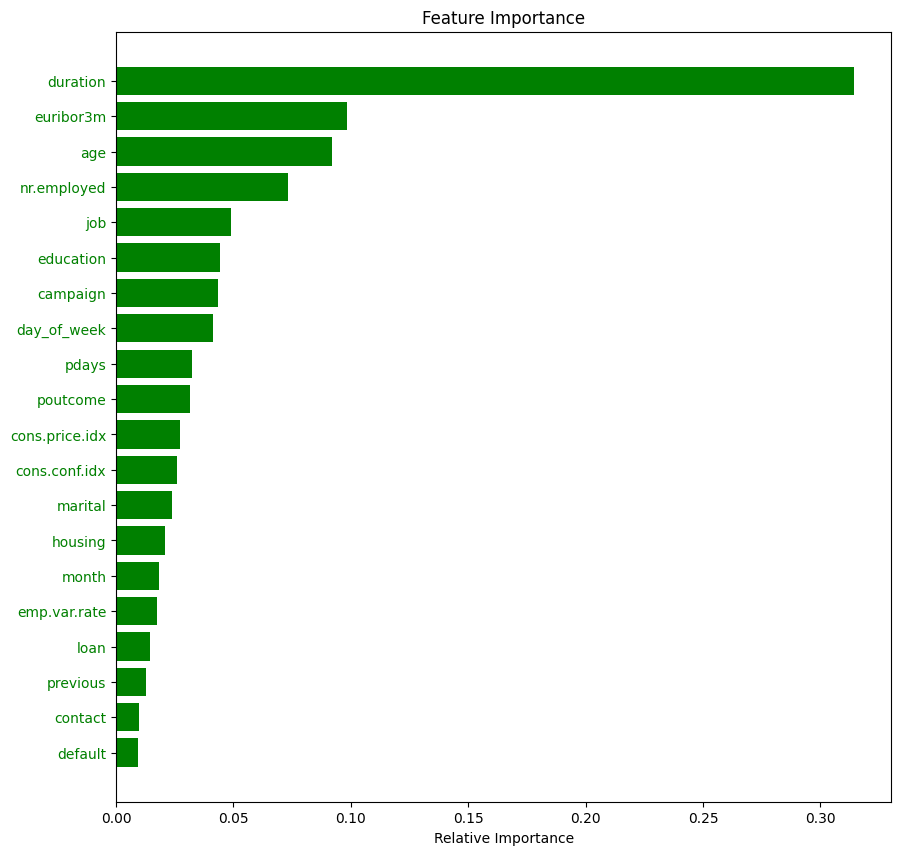

In [55]:
fig , ax = plt.subplots(figsize=(10,10))

plt.barh(range(len(indices)),importance[indices],color='g')

plt.yticks(range(len(indices)),[features[i] for i in indices],color='g')

plt.title('Feature Importance')

plt.xlabel('Relative Importance')

plt.show()

## **Report [Click](https://docs.google.com/presentation/d/1EUBo-8NGHVwTj8CslaH-DnlMhDxus8It/edit?usp=sharing&ouid=101321301050382286839&rtpof=true&sd=true)**